Синтез лиц из LFW с помощью DCGAN

### Импорт библиотек


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

### Загрузка датасета LFW


In [ ]:
tfds.disable_progress_bar()
train_ds, ds_info = tfds.load(
    'lfw',
    with_info=True,
    split='train',
)

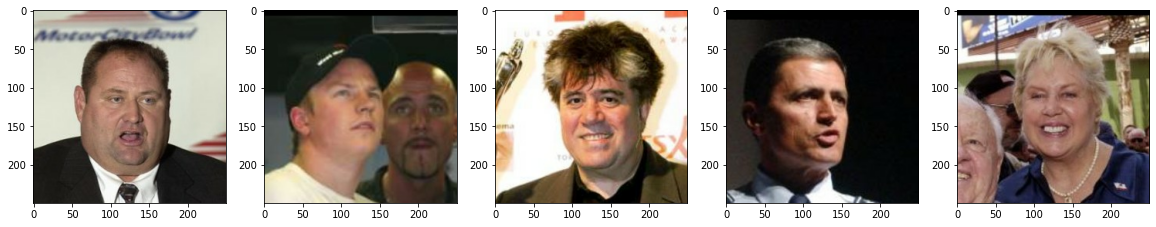

In [ ]:
fig = plt.figure(figsize=(20, 30))
for i, example in enumerate(train_ds.take(5)):
  image = example['image']
  plt.subplot(1, 5, i+1)
  plt.imshow(image.numpy().astype(np.float32)/255)

In [ ]:
def plot_faces(samples):
    fig = plt.figure(figsize=(20, 20))
    num = samples.shape[0]
    for j in range(num):
        ax = fig.add_subplot(6, 8, j+1)
        ax.imshow(samples[j, ...].reshape(28, 28), cmap='gray')
        plt.xticks([]), plt.yticks([])
    plt.show()

## Deep Convolutional GAN (DCGAN)

In [ ]:
generator = tf.keras.Sequential([
    tf.keras.layers.Dense(128*7*7, activation='relu'),
    tf.keras.layers.Reshape((7, 7, 128)),
    tf.keras.layers.UpSampling2D((2, 2)),    
    tf.keras.layers.Conv2D(128, (3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.8),
    tf.keras.layers.LeakyReLU(),    
    tf.keras.layers.UpSampling2D((2, 2)),    
    tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.8),
    tf.keras.layers.LeakyReLU(),    
    tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='tanh'),
])

discriminator = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same'),
    tf.keras.layers.LeakyReLU(0.2),
    tf.keras.layers.Dropout(0.25),    
    tf.keras.layers.Conv2D(64, kernel_size=3, strides=(2, 2), padding='same'),
    tf.keras.layers.ZeroPadding2D(padding=((0, 1), (0, 1))),
    tf.keras.layers.BatchNormalization(momentum=0.8),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, kernel_size=3, strides=(2, 2), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.8),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, kernel_size=3, strides=(1, 1), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.8),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1),
])

### Подготовка пайплайна

In [ ]:
train_x = [tf.image.rgb_to_grayscale(x['image'].numpy().reshape(250, 250, 3)) for x in train_ds]
train_x[0].shape

TensorShape([250, 250, 1])

In [ ]:
def normalize(image):
  image = tf.cast(image, tf.float32) / 255.
  return tf.image.resize(image, (28, 28))


INPUT_DIM = 100
NUM_EPOCHS = 50
HALF_BATCH_SIZE = 16
BATCH_SIZE = HALF_BATCH_SIZE * 2
LEARNING_RATE = 0.0002

train_ds = tf.data.Dataset.from_tensor_slices(train_x)
train_ds = train_ds.shuffle(buffer_size=len(train_x))
train_ds = train_ds.map(normalize)
train_ds = train_ds.repeat(NUM_EPOCHS)
train_ds = train_ds.batch(HALF_BATCH_SIZE, drop_remainder=True)

optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)
sigmoid_cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
train_ds

<BatchDataset element_spec=TensorSpec(shape=(16, 28, 28, 1), dtype=tf.float32, name=None)>

## Обучение дискриминатора и генератора

[Step  0] D Loss: 0.7863; G Loss: 0.6566


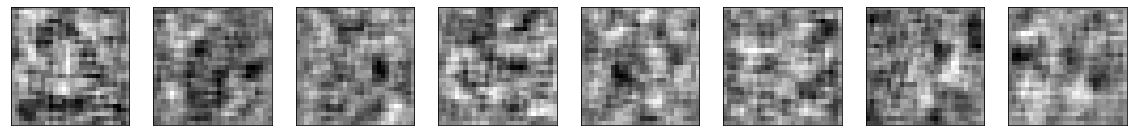

[Step 500] D Loss: 0.7448; G Loss: 0.1851


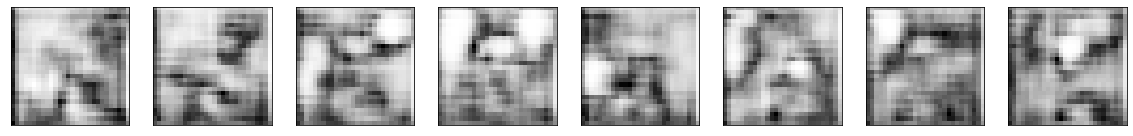

[Step 1000] D Loss: 0.2394; G Loss: 1.9444


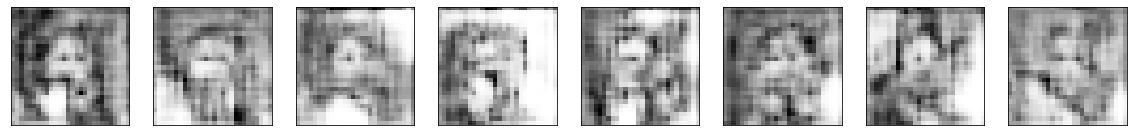

[Step 1500] D Loss: 0.6512; G Loss: 2.1221


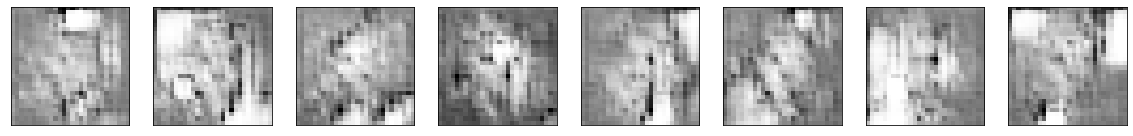

[Step 2000] D Loss: 0.5282; G Loss: 1.4084


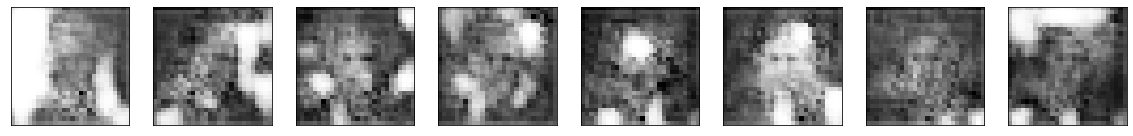

[Step 2500] D Loss: 0.5575; G Loss: 2.1497


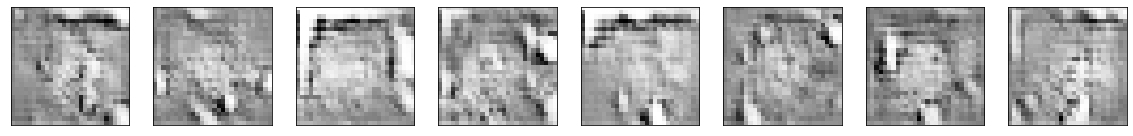

[Step 3000] D Loss: 0.5654; G Loss: 3.3918


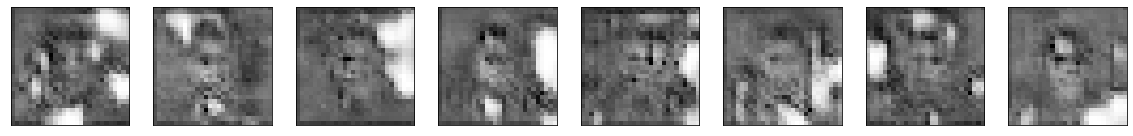

[Step 3500] D Loss: 0.4187; G Loss: 1.2170


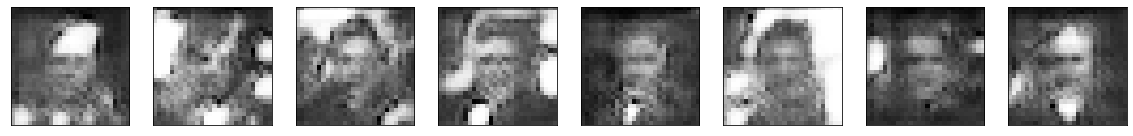

[Step 4000] D Loss: 0.5319; G Loss: 1.7881


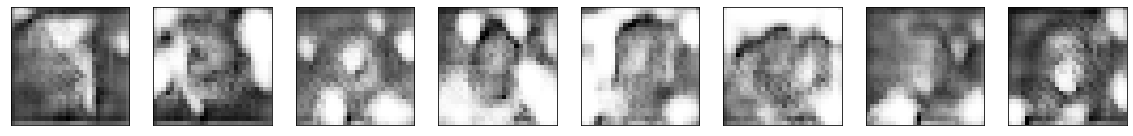

[Step 4500] D Loss: 0.3852; G Loss: 1.3995


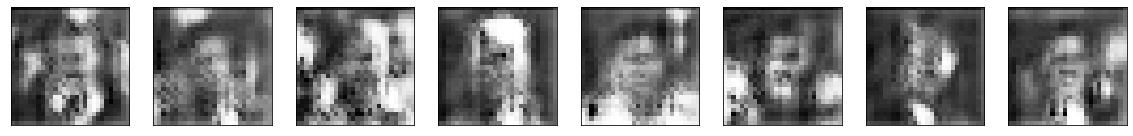

[Step 5000] D Loss: 0.5048; G Loss: 2.5938


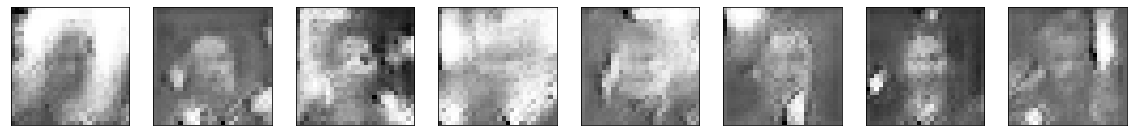

[Step 5500] D Loss: 0.2775; G Loss: 2.0295


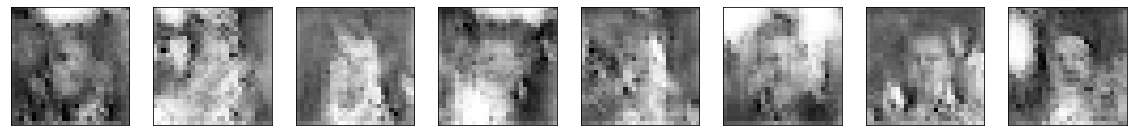

[Step 6000] D Loss: 0.5368; G Loss: 1.6757


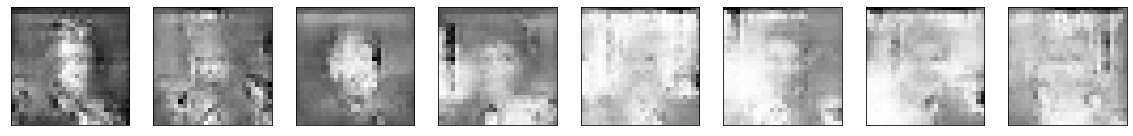

[Step 6500] D Loss: 0.4774; G Loss: 2.6231


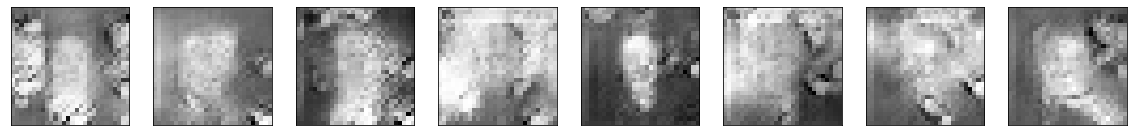

[Step 7000] D Loss: 0.2950; G Loss: 3.5223


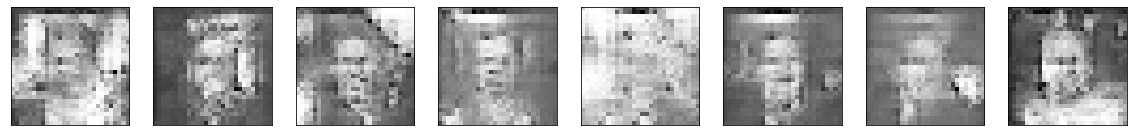

[Step 7500] D Loss: 0.4764; G Loss: 2.7745


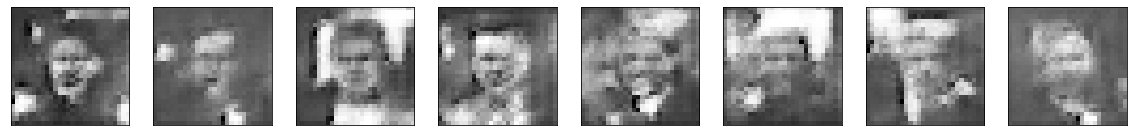

[Step 8000] D Loss: 0.5028; G Loss: 2.1274


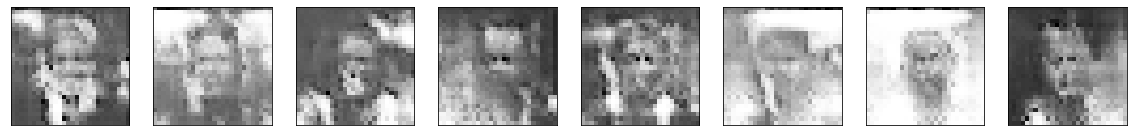

[Step 8500] D Loss: 0.3237; G Loss: 2.3837


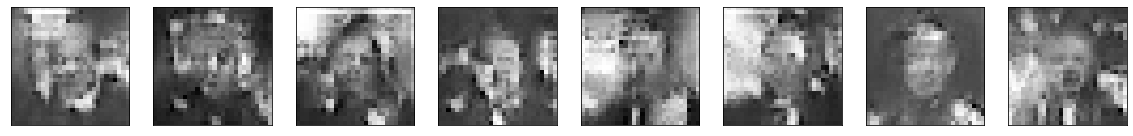

[Step 9000] D Loss: 0.6529; G Loss: 2.7719


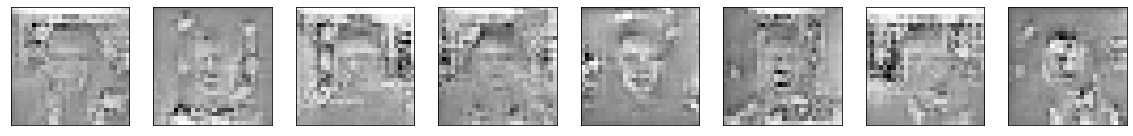

[Step 9500] D Loss: 0.4801; G Loss: 2.2458


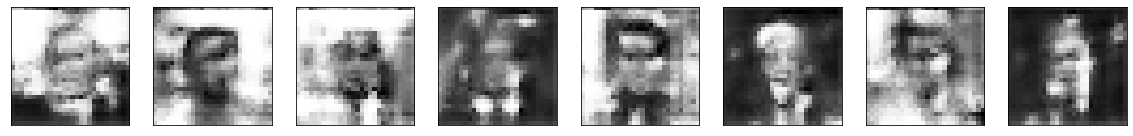

[Step 10000] D Loss: 0.3970; G Loss: 3.2476


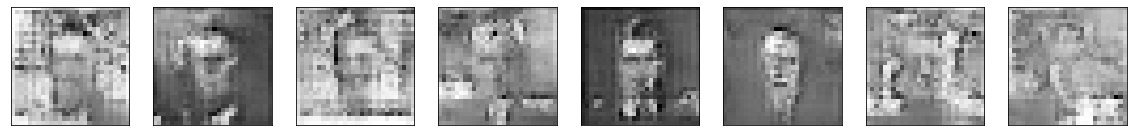

[Step 10500] D Loss: 0.3591; G Loss: 2.3408


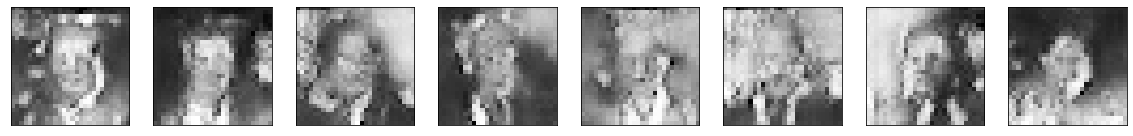

[Step 11000] D Loss: 0.4717; G Loss: 2.1622


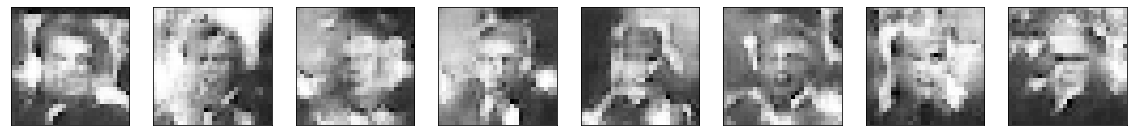

[Step 11500] D Loss: 0.4373; G Loss: 2.0691


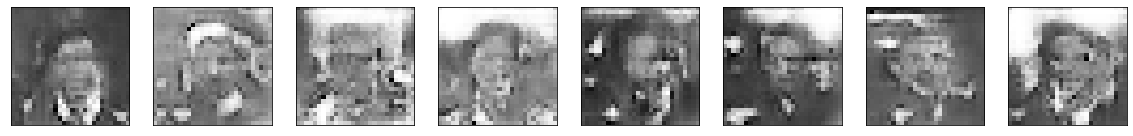

[Step 12000] D Loss: 0.5040; G Loss: 1.7428


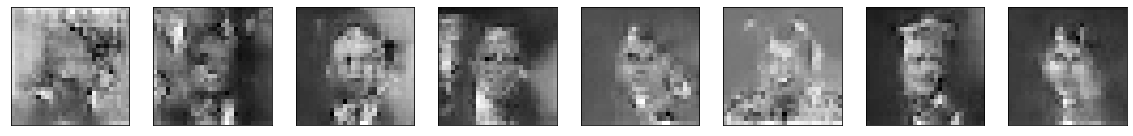

[Step 12500] D Loss: 0.5902; G Loss: 1.5894


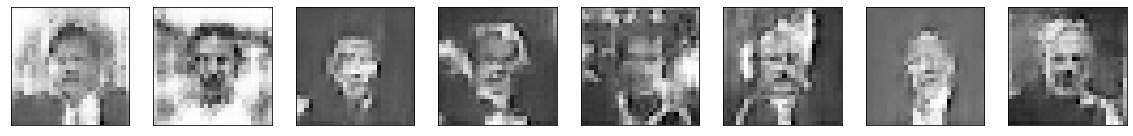

[Step 13000] D Loss: 0.4461; G Loss: 1.9047


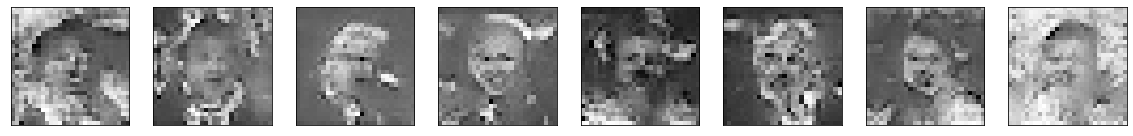

[Step 13500] D Loss: 0.4156; G Loss: 2.0862


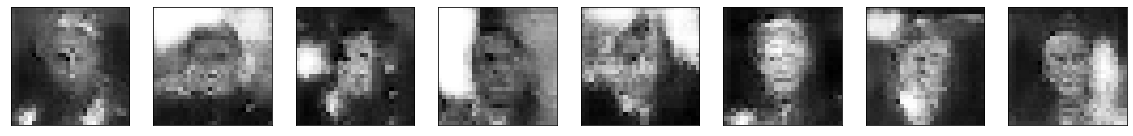

[Step 14000] D Loss: 0.5048; G Loss: 1.7552


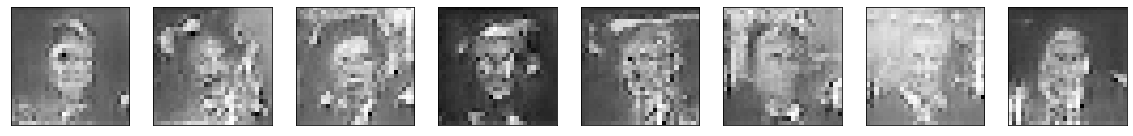

[Step 14500] D Loss: 0.4015; G Loss: 1.8474


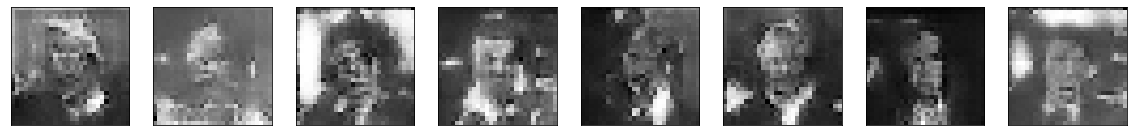

[Step 15000] D Loss: 0.4665; G Loss: 1.7526


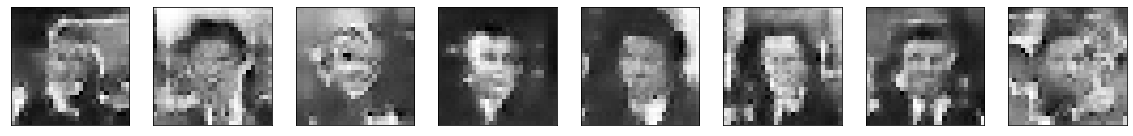

[Step 15500] D Loss: 0.4223; G Loss: 1.8576


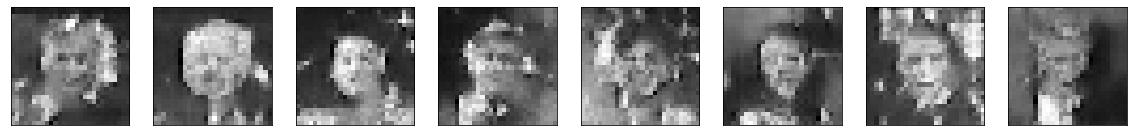

[Step 16000] D Loss: 0.4446; G Loss: 2.1012


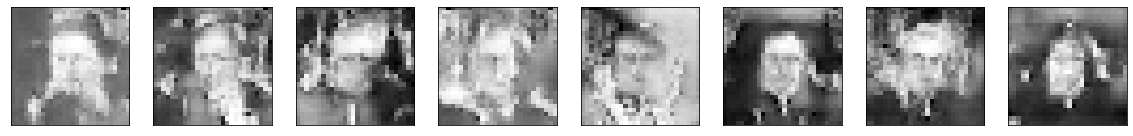

[Step 16500] D Loss: 0.7010; G Loss: 1.7560


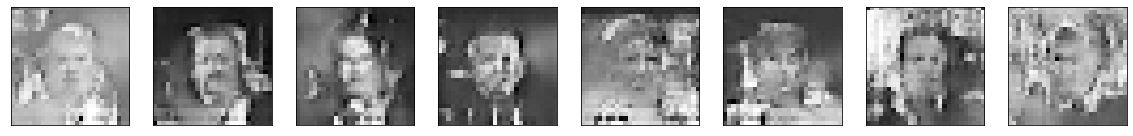

[Step 17000] D Loss: 0.5086; G Loss: 1.1806


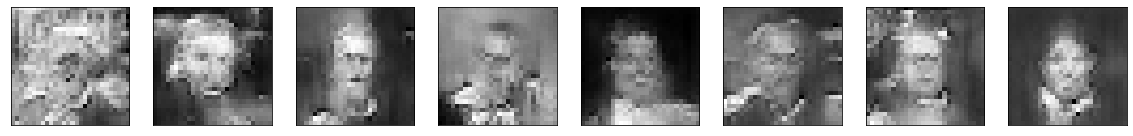

[Step 17500] D Loss: 0.4254; G Loss: 1.3590


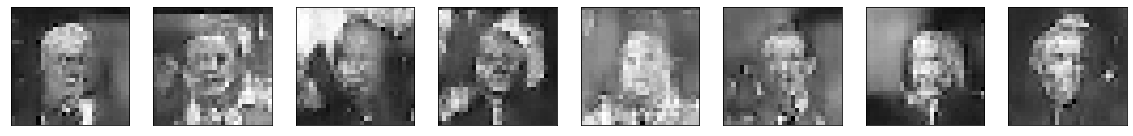

[Step 18000] D Loss: 0.5596; G Loss: 2.0398


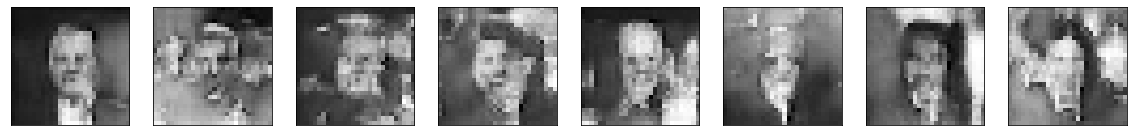

[Step 18500] D Loss: 0.6238; G Loss: 1.3884


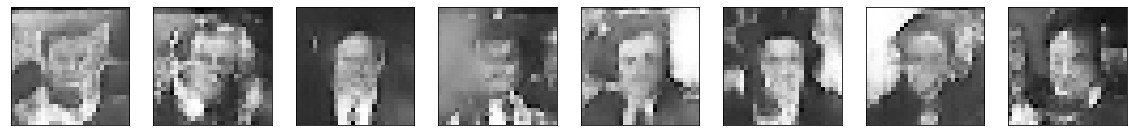

[Step 19000] D Loss: 0.5362; G Loss: 1.5866


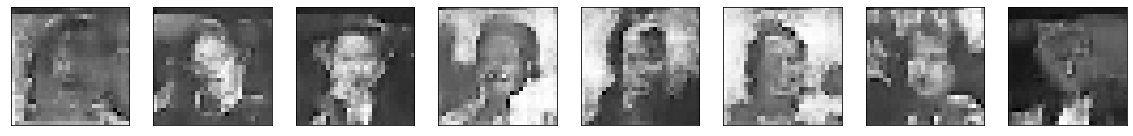

[Step 19500] D Loss: 0.4088; G Loss: 1.4260


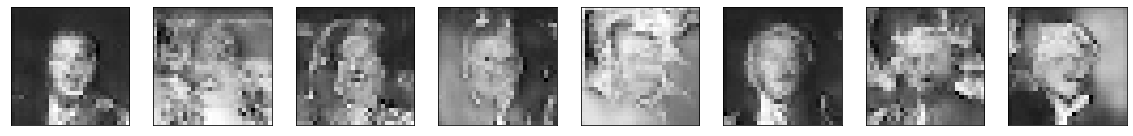

[Step 20000] D Loss: 0.5768; G Loss: 1.5966


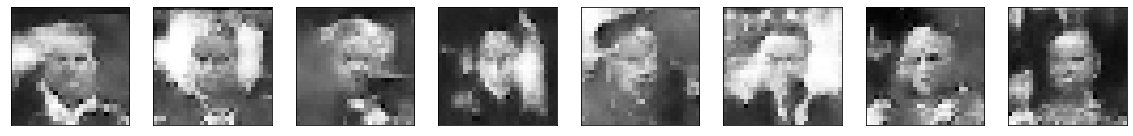

[Step 20500] D Loss: 0.4850; G Loss: 1.8814


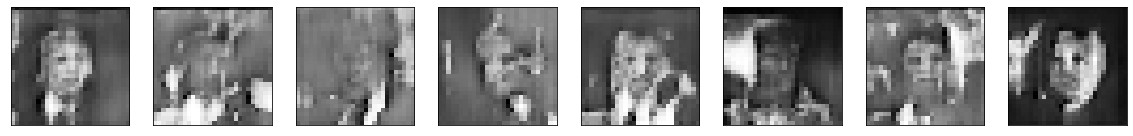

[Step 21000] D Loss: 0.4282; G Loss: 1.4383


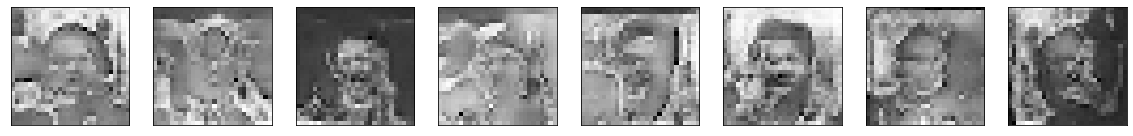

[Step 21500] D Loss: 0.4673; G Loss: 1.3699


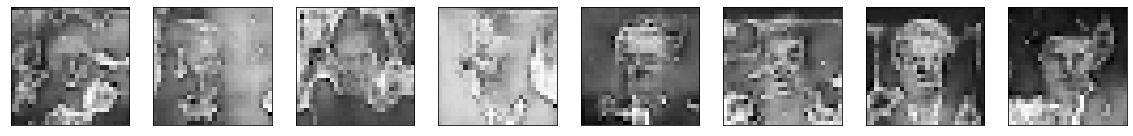

[Step 22000] D Loss: 0.8172; G Loss: 1.6035


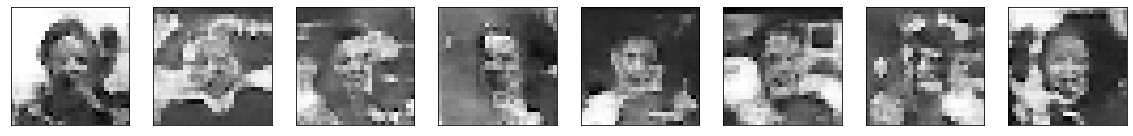

[Step 22500] D Loss: 0.5275; G Loss: 1.2861


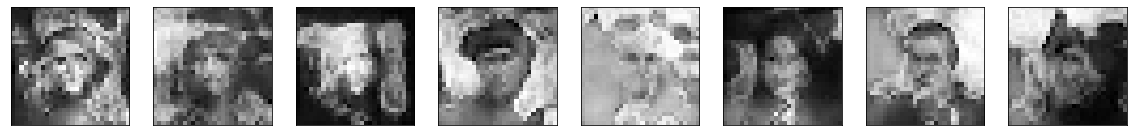

[Step 23000] D Loss: 0.5626; G Loss: 1.5166


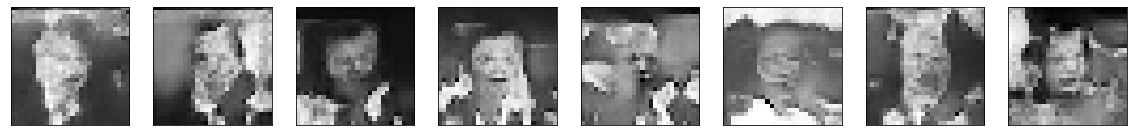

[Step 23500] D Loss: 0.5925; G Loss: 1.3368


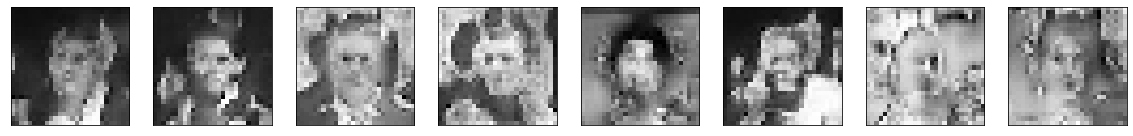

[Step 24000] D Loss: 0.7360; G Loss: 1.3544


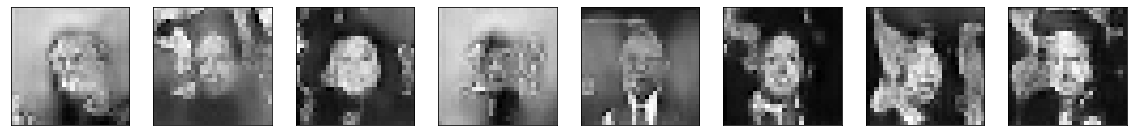

[Step 24500] D Loss: 0.5009; G Loss: 1.2936


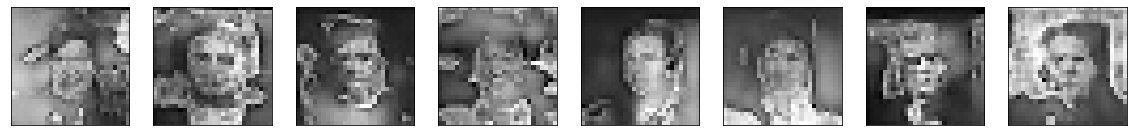

[Step 25000] D Loss: 0.3862; G Loss: 1.8364


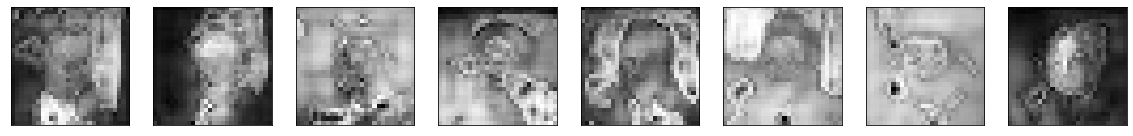

[Step 25500] D Loss: 0.5196; G Loss: 1.3664


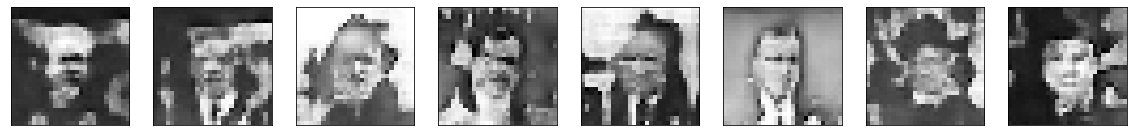

[Step 26000] D Loss: 0.4146; G Loss: 1.5406


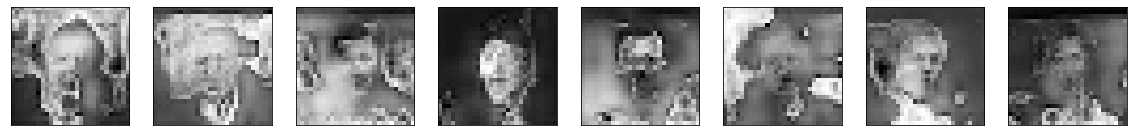

[Step 26500] D Loss: 0.6547; G Loss: 1.1665


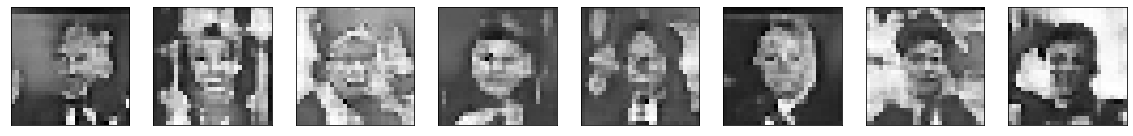

[Step 27000] D Loss: 0.5161; G Loss: 1.3468


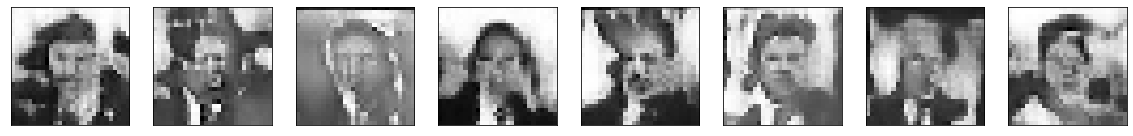

[Step 27500] D Loss: 0.4881; G Loss: 1.8587


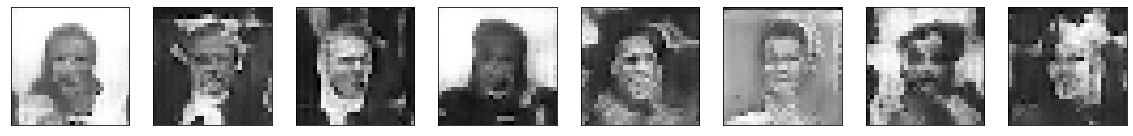

[Step 28000] D Loss: 0.4115; G Loss: 1.5969


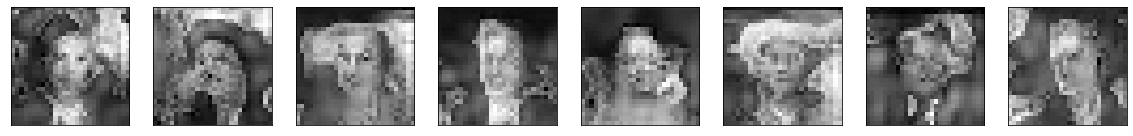

[Step 28500] D Loss: 0.5428; G Loss: 1.8779


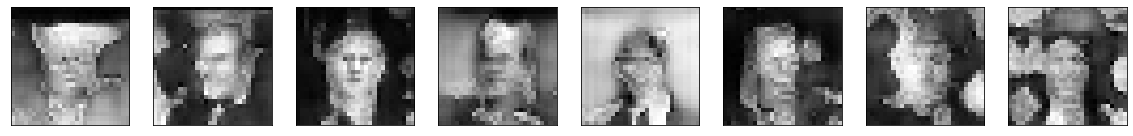

[Step 29000] D Loss: 0.6182; G Loss: 1.0536


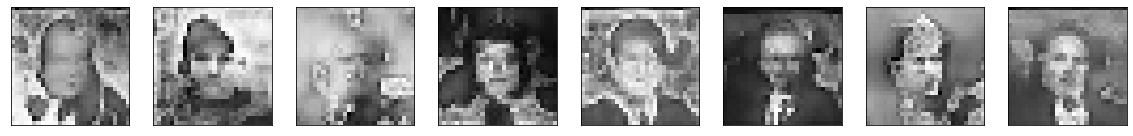

[Step 29500] D Loss: 0.5503; G Loss: 1.9836


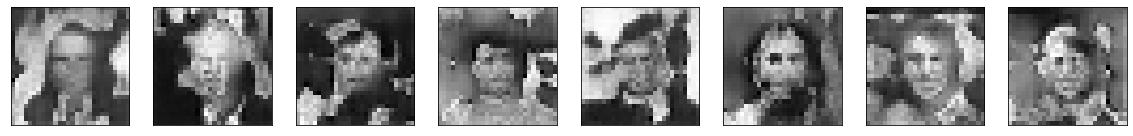

[Step 30000] D Loss: 0.5910; G Loss: 1.5143


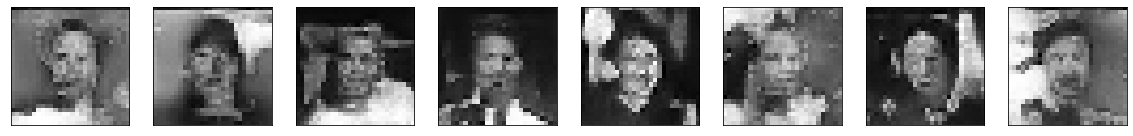

[Step 30500] D Loss: 0.5084; G Loss: 1.4475


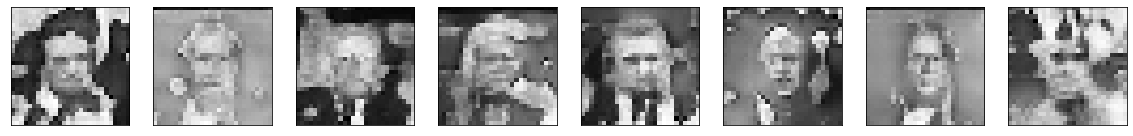

[Step 31000] D Loss: 0.6385; G Loss: 1.0535


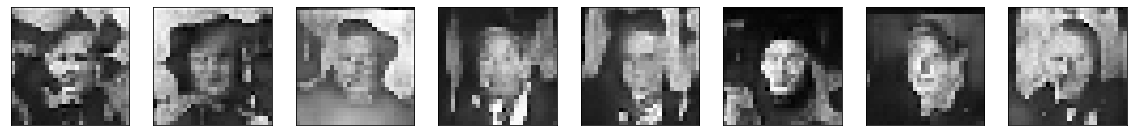

[Step 31500] D Loss: 0.5147; G Loss: 1.7211


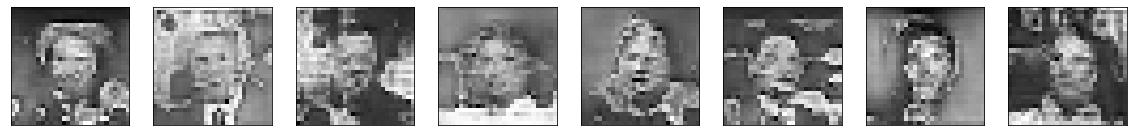

[Step 32000] D Loss: 0.5316; G Loss: 1.1579


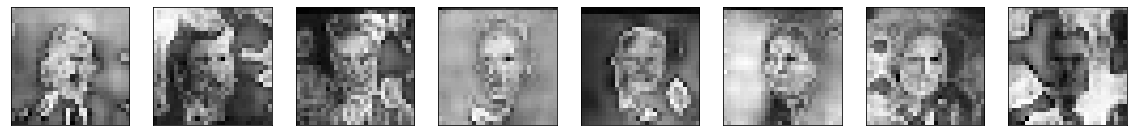

[Step 32500] D Loss: 0.6368; G Loss: 1.1257


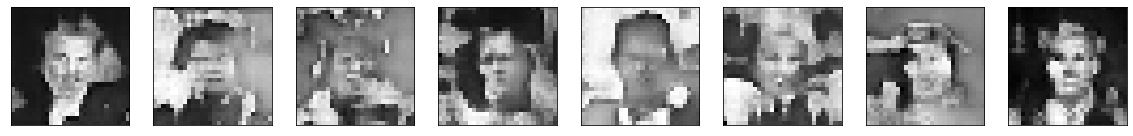

[Step 33000] D Loss: 0.7278; G Loss: 1.3749


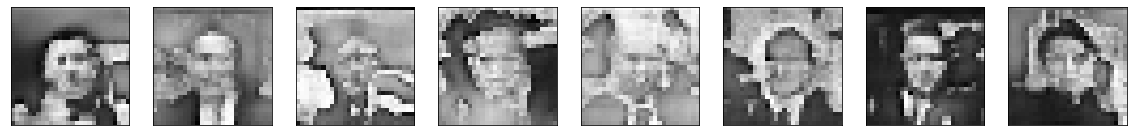

[Step 33500] D Loss: 0.5404; G Loss: 1.2744


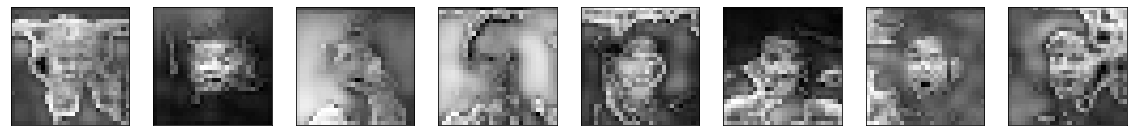

[Step 34000] D Loss: 0.4339; G Loss: 1.8709


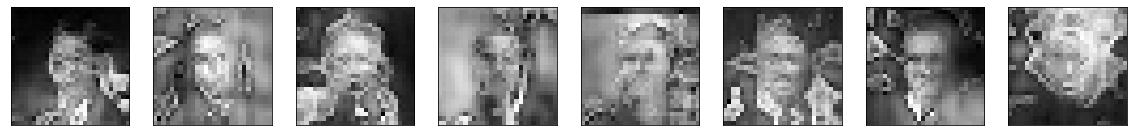

[Step 34500] D Loss: 0.4540; G Loss: 1.6197


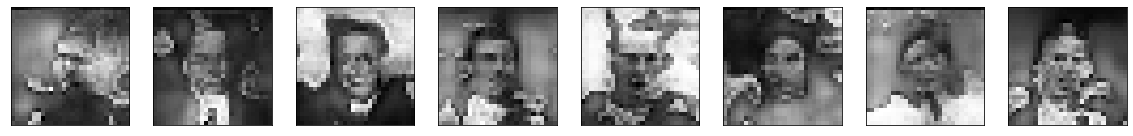

[Step 35000] D Loss: 0.6595; G Loss: 1.3991


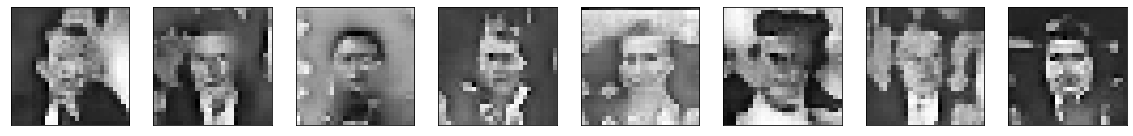

[Step 35500] D Loss: 0.3533; G Loss: 2.0414


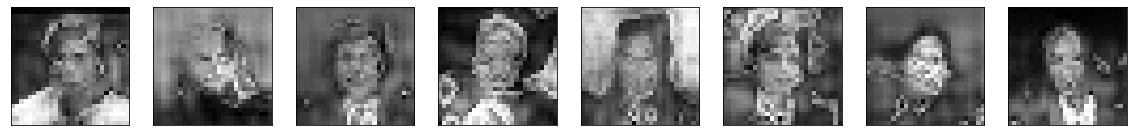

[Step 36000] D Loss: 0.7773; G Loss: 1.4580


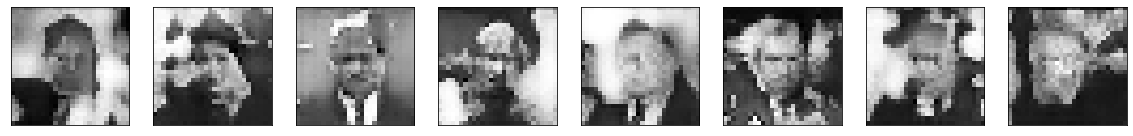

[Step 36500] D Loss: 0.5138; G Loss: 0.8380


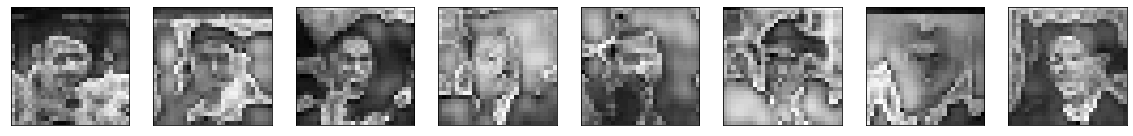

[Step 37000] D Loss: 0.4689; G Loss: 1.9154


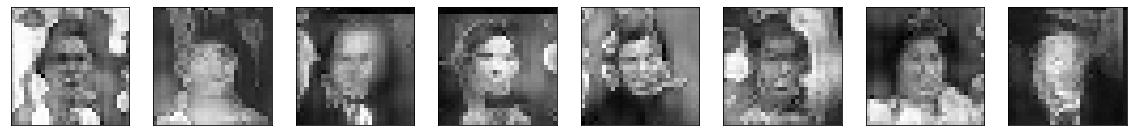

[Step 37500] D Loss: 0.7974; G Loss: 1.2878


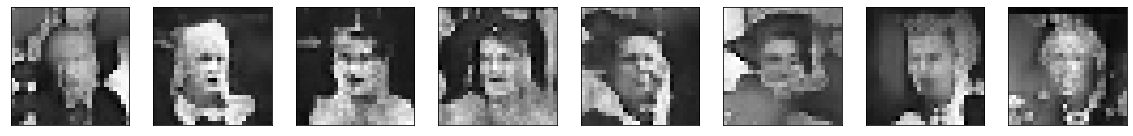

[Step 38000] D Loss: 0.4278; G Loss: 1.5276


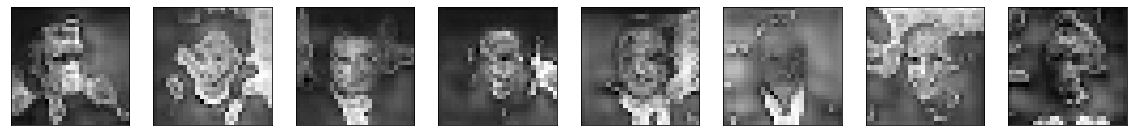

[Step 38500] D Loss: 0.4170; G Loss: 1.1648


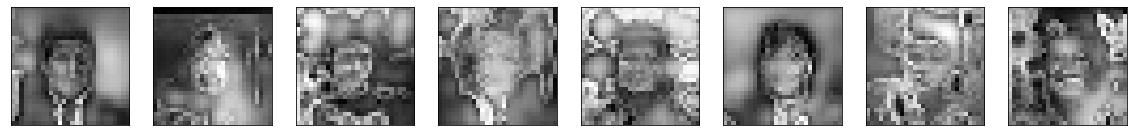

[Step 39000] D Loss: 0.5401; G Loss: 0.9968


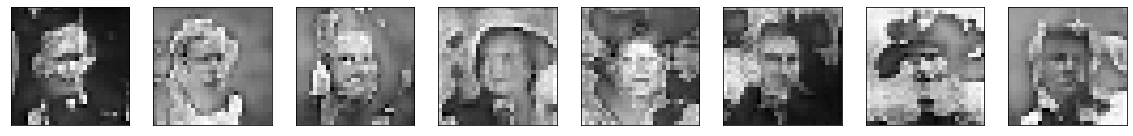

[Step 39500] D Loss: 0.4411; G Loss: 2.0375


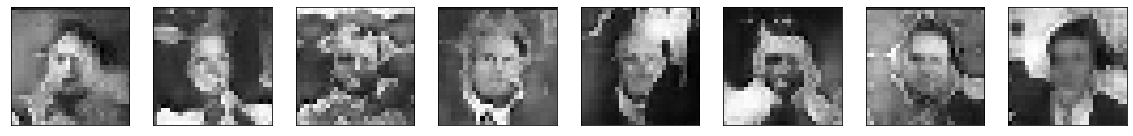

[Step 40000] D Loss: 0.5538; G Loss: 1.2884


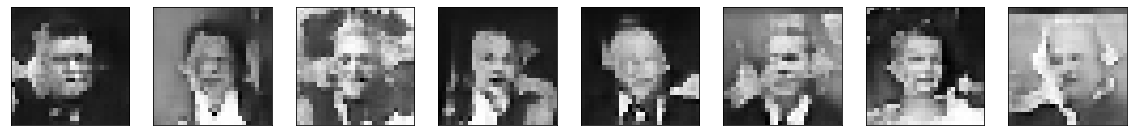

[Step 40500] D Loss: 0.4275; G Loss: 2.0892


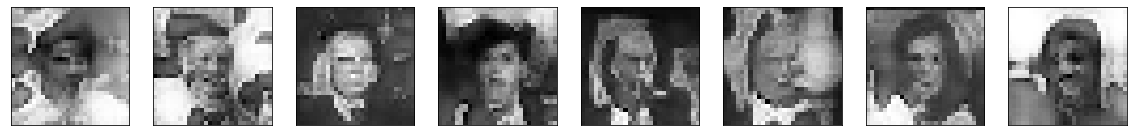

[Step 41000] D Loss: 0.4942; G Loss: 1.2395


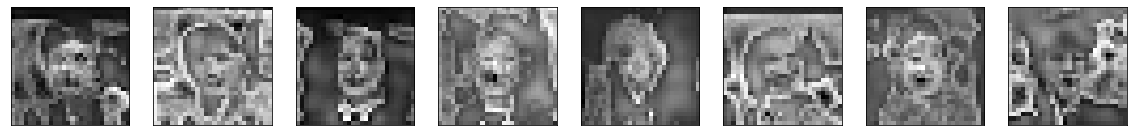

In [ ]:
for step, true_images in enumerate(train_ds):
    
    # Train Discriminator
    
    noise = np.random.normal(0, 1, (HALF_BATCH_SIZE, INPUT_DIM)).astype(np.float32)
    syntetic_images = generator.predict(noise)
    x_combined = np.concatenate((
        true_images, 
        syntetic_images))
    y_combined = np.concatenate((
        np.ones((HALF_BATCH_SIZE, 1), np.float32), 
        np.zeros((HALF_BATCH_SIZE, 1), np.float32)))
    
    with tf.GradientTape() as tape:
        logits = discriminator(x_combined, training=True)
        d_loss_value = sigmoid_cross_entropy(y_combined, logits)
    grads = tape.gradient(d_loss_value, discriminator.trainable_variables)
    optimizer.apply_gradients(zip(grads, discriminator.trainable_variables))
    
    # Train Generator
    
    noise = np.random.normal(0, 1, (BATCH_SIZE, INPUT_DIM)).astype(np.float32)
    y_mislabled = np.ones((BATCH_SIZE, 1), np.float32)
    
    with tf.GradientTape() as tape:
        syntetic = generator(noise, training=True)
        logits = discriminator(syntetic, training=False)
        g_loss_value = sigmoid_cross_entropy(y_mislabled, logits)
    grads = tape.gradient(g_loss_value, generator.trainable_variables)
    optimizer.apply_gradients(zip(grads, generator.trainable_variables))
    
    # Check intermediate results
    
    if step % 500 == 0:
        print('[Step %2d] D Loss: %.4f; G Loss: %.4f' % (
            step, d_loss_value.numpy(), g_loss_value.numpy()))
        noise = np.random.normal(0, 1, (8, INPUT_DIM)).astype(np.float32)
        syntetic_images = generator.predict(noise)
        plot_faces(syntetic_images)


### Тестирование генератора

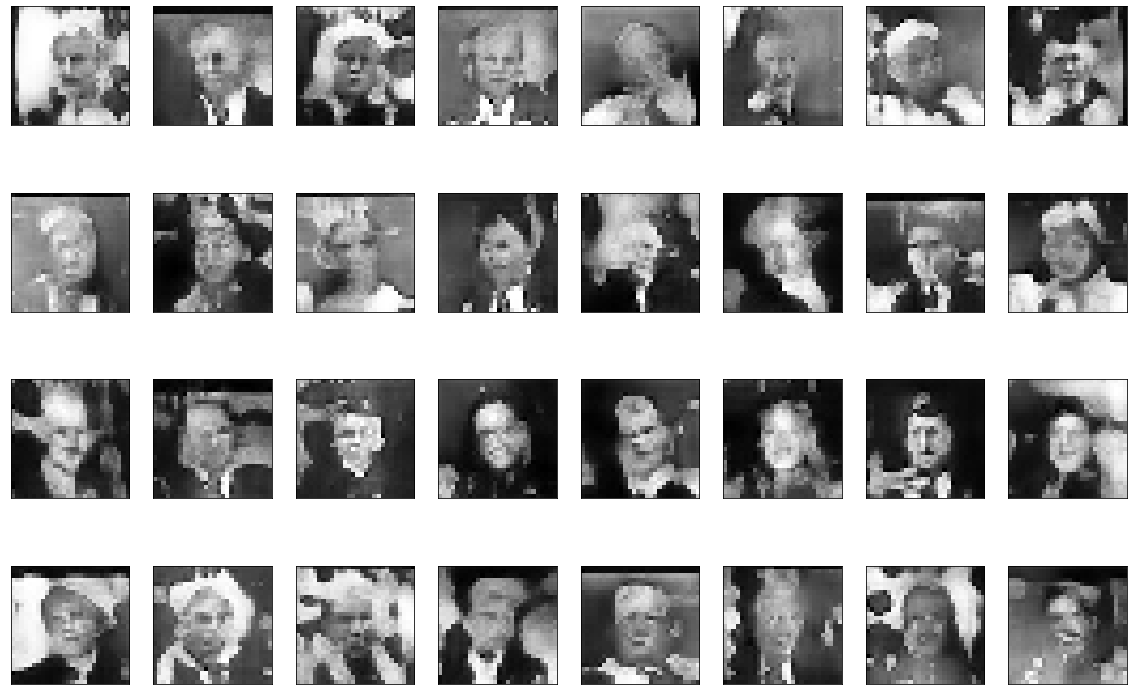

In [ ]:
noise = np.random.normal(0, 1, (32, INPUT_DIM)).astype(np.float32)
syntetic_images = generator.predict(noise)
plot_faces(syntetic_images)

## Интерполяция в латентном пространстве

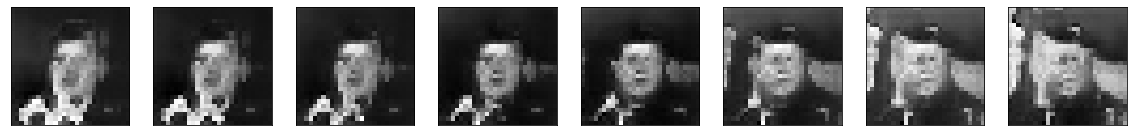

In [ ]:
noise_1 = np.random.normal(0, 1, (INPUT_DIM)).astype(np.float32)
noise_2 = np.random.normal(0, 1, (INPUT_DIM)).astype(np.float32)
noise = np.linspace(noise_1, noise_2, 8)
syntetic_images = generator.predict(noise)
plot_faces(syntetic_images)